In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [93]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [94]:
path = "/content/drive/MyDrive/Colab Notebooks/projects/goibibo data analyses/goibibo_flights_data.csv"
df = pd.read_csv(path) #dataframe.....reads datseat

In [95]:
pd.set_option("display.max_columns",None)
df.head(3) #small smike pic of data

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops,Unnamed: 11,Unnamed: 12
0,26-06-2023,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,"6,013",non-stop,NaN,NaN
1,26-06-2023,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,"6,013",non-stop,NaN,NaN
2,26-06-2023,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,"6,016",non-stop,NaN,NaN


In [96]:
df = df.drop(["Unnamed: 11","Unnamed: 12"],axis = 1) #axis = 1 means columns, axis = 0 means (rows)

In [97]:
df.head(3)

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops
0,26-06-2023,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,"6,013",non-stop
1,26-06-2023,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,"6,013",non-stop
2,26-06-2023,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,"6,016",non-stop


In [98]:
df.shape #rows and columns

(300261, 11)

In [99]:
df.columns

Index(['flight date', 'airline', 'flight_num', 'class', 'from', 'dep_time',
       'to', 'arr_time', 'duration', 'price', 'stops'],
      dtype='object')

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   flight date  300261 non-null  object
 1   airline      300261 non-null  object
 2   flight_num   300261 non-null  object
 3   class        300261 non-null  object
 4   from         300261 non-null  object
 5   dep_time     300261 non-null  object
 6   to           300261 non-null  object
 7   arr_time     300261 non-null  object
 8   duration     300261 non-null  object
 9   price        300261 non-null  object
 10  stops        300261 non-null  object
dtypes: object(11)
memory usage: 25.2+ MB


In [101]:
df.describe()

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops
count,300261,300261,300261,300261,300261,300261,300261,300261,300261,300261,300261
unique,49,8,1569,2,6,251,6,266,483,12170,40
top,20-07-2023,Vistara,UK-706,economy,Delhi,07:00,Mumbai,19:55,02h 10m,"55,427",1-stop
freq,6633,127859,3235,206774,61345,8760,59109,9194,4242,1445,243603


# Data Wrangling

In [102]:
df["flight date"] = pd.to_datetime(df["flight date"],format = "%d-%m-%Y")

In [103]:
df.head()

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops
0,2023-06-26,SpiceJet,SG-8709,economy,Delhi,18:55,Mumbai,21:05,02h 10m,"6,013",non-stop
1,2023-06-26,SpiceJet,SG-8157,economy,Delhi,06:20,Mumbai,08:40,02h 20m,"6,013",non-stop
2,2023-06-26,AirAsia,I5-764,economy,Delhi,04:25,Mumbai,06:35,02h 10m,"6,016",non-stop
3,2023-06-26,Vistara,UK-995,economy,Delhi,10:20,Mumbai,12:35,02h 15m,"6,015",non-stop
4,2023-06-26,Vistara,UK-963,economy,Delhi,08:50,Mumbai,11:10,02h 20m,"6,015",non-stop


In [104]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   flight date  300261 non-null  datetime64[ns]
 1   airline      300261 non-null  object        
 2   flight_num   300261 non-null  object        
 3   class        300261 non-null  object        
 4   from         300261 non-null  object        
 5   dep_time     300261 non-null  object        
 6   to           300261 non-null  object        
 7   arr_time     300261 non-null  object        
 8   duration     300261 non-null  object        
 9   price        300261 non-null  object        
 10  stops        300261 non-null  object        
dtypes: datetime64[ns](1), object(10)
memory usage: 25.2+ MB


In [105]:
df['dep_time'] = pd.to_datetime(df['dep_time'], format='%H:%M').dt.time
df['arr_time'] = pd.to_datetime(df['arr_time'], format='%H:%M').dt.time

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   flight date  300261 non-null  datetime64[ns]
 1   airline      300261 non-null  object        
 2   flight_num   300261 non-null  object        
 3   class        300261 non-null  object        
 4   from         300261 non-null  object        
 5   dep_time     300261 non-null  object        
 6   to           300261 non-null  object        
 7   arr_time     300261 non-null  object        
 8   duration     300261 non-null  object        
 9   price        300261 non-null  object        
 10  stops        300261 non-null  object        
dtypes: datetime64[ns](1), object(10)
memory usage: 25.2+ MB


In [107]:
df.head()

,flight date,airline,flight_num,class,from,dep_time,to,arr_time,duration,price,stops
0,2023-06-26,SpiceJet,SG-8709,economy,Delhi,18:55:00,Mumbai,21:05:00,02h 10m,"6,013",non-stop
1,2023-06-26,SpiceJet,SG-8157,economy,Delhi,06:20:00,Mumbai,08:40:00,02h 20m,"6,013",non-stop
2,2023-06-26,AirAsia,I5-764,economy,Delhi,04:25:00,Mumbai,06:35:00,02h 10m,"6,016",non-stop
3,2023-06-26,Vistara,UK-995,economy,Delhi,10:20:00,Mumbai,12:35:00,02h 15m,"6,015",non-stop
4,2023-06-26,Vistara,UK-963,economy,Delhi,08:50:00,Mumbai,11:10:00,02h 20m,"6,015",non-stop


In [108]:
df=df.rename(columns= {"from":"Departure","to":"Arrival","class":"Class","flight date": "Flight Date","airline":"Airline","flight_num":"Flight No.","dep_time":"Departure Time","arr_time":"Arrival Time","duration":"Duration","price":"Price","stops":"Stops"})

In [109]:
df["Duration hours"]= df["Duration"].apply(lambda x: int(re.findall(r"\d+",x.split("h")[0])[0]))
df

,Flight Date,Airline,Flight No.,Class,Departure,Departure Time,Arrival,Arrival Time,Duration,Price,Stops,Duration hours
0,2023-06-26,SpiceJet,SG-8709,economy,Delhi,18:55:00,Mumbai,21:05:00,02h 10m,"6,013",non-stop,2
1,2023-06-26,SpiceJet,SG-8157,economy,Delhi,06:20:00,Mumbai,08:40:00,02h 20m,"6,013",non-stop,2
2,2023-06-26,AirAsia,I5-764,economy,Delhi,04:25:00,Mumbai,06:35:00,02h 10m,"6,016",non-stop,2
3,2023-06-26,Vistara,UK-995,economy,Delhi,10:20:00,Mumbai,12:35:00,02h 15m,"6,015",non-stop,2
4,2023-06-26,Vistara,UK-963,economy,Delhi,08:50:00,Mumbai,11:10:00,02h 20m,"6,015",non-stop,2
...,...,...,...,...,...,...,...,...,...,...,...,...
300256,2023-08-13,Vistara,UK-822,business,Chennai,09:45:00,Hyderabad,19:50:00,10h 05m,"70,304",1-stop,10
300257,2023-08-13,Vistara,UK-826,business,Chennai,12:30:00,Hyderabad,22:55:00,10h 25m,"78,262",1-stop,10
300258,2023-08-13,Vistara,UK-832,business,Chennai,07:05:00,Hyderabad,20:55:00,13h 50m,"80,285",1-stop,13
300259,2023-08-13,Vistara,UK-828,business,Chennai,07:00:00,Hyderabad,17:00:00,10h 00m,"82,809",1-stop,10


In [110]:
df.head()

,Flight Date,Airline,Flight No.,Class,Departure,Departure Time,Arrival,Arrival Time,Duration,Price,Stops,Duration hours
0,2023-06-26,SpiceJet,SG-8709,economy,Delhi,18:55:00,Mumbai,21:05:00,02h 10m,"6,013",non-stop,2
1,2023-06-26,SpiceJet,SG-8157,economy,Delhi,06:20:00,Mumbai,08:40:00,02h 20m,"6,013",non-stop,2
2,2023-06-26,AirAsia,I5-764,economy,Delhi,04:25:00,Mumbai,06:35:00,02h 10m,"6,016",non-stop,2
3,2023-06-26,Vistara,UK-995,economy,Delhi,10:20:00,Mumbai,12:35:00,02h 15m,"6,015",non-stop,2
4,2023-06-26,Vistara,UK-963,economy,Delhi,08:50:00,Mumbai,11:10:00,02h 20m,"6,015",non-stop,2


In [111]:
df["Duration"].unique()

array(['02h 10m', '02h 20m', '02h 15m', '02h 05m', '12h 15m', '16h 20m',
       '11h 45m', '14h 30m', '15h 40m', '03h 45m', '02h 30m', '05h 50m',
       '08h 00m', '06h 00m', '14h 40m', '16h 10m', '18h 00m', '23h 10m',
       '24h 10m', '08h 50m', '04h 30m', '15h 15m', '11h 00m', '19h 05m',
       '22h 50m', '26h 25m', '17h 45m', '19h 35m', '26h 40m', '15h 10m',
       '20h 50m', '11h 25m', '22h 15m', '26h 00m', '21h 45m', '03h 50m',
       '04h 25m', '07h 40m', '08h 20m', '10h 25m', '23h 45m', '19h 30m',
       '06h 30m', '12h 25m', '21h 05m', '28h 10m', '28h 15m', '09h 15m',
       '17h 55m', '07h 05m', '13h 50m', '07h 35m', '15h 50m', '24h 25m',
       '04h 10m', '04h 15m', '05h 05m', '29h 20m', '17h 00m', '27h 10m',
       '24h 45m', '05h 45m', '12h 45m', '13h 45m', '17h 50m', '05h 30m',
       '23h 50m', '05h 00m', '26h 30m', '12h 50m', '08h 55m', '11h 10m',
       '12h 10m', '15h 35m', '15h 45m', '07h 55m', '13h 15m', '16h 00m',
       '22h 45m', '06h 20m', '07h 15m', '30h 05m', 

In [112]:
def convert_duration_to_minutes(duration):
    hours = 0
    minutes = 0

    # Use regex to safely extract hours and minutes
    hours_match = re.search(r'(\d+)h', duration)
    minutes_match = re.search(r'(\d+)m', duration)

    if hours_match:
        hours = int(hours_match.group(1))
    if minutes_match:
        minutes = int(minutes_match.group(1))

    return minutes

# Apply the function to the 'Duration' column
df['Duration Minutes'] = df['Duration'].apply(convert_duration_to_minutes)




In [113]:
df.head()

,Flight Date,Airline,Flight No.,Class,Departure,Departure Time,Arrival,Arrival Time,Duration,Price,Stops,Duration hours,Duration Minutes
0,2023-06-26,SpiceJet,SG-8709,economy,Delhi,18:55:00,Mumbai,21:05:00,02h 10m,"6,013",non-stop,2,10
1,2023-06-26,SpiceJet,SG-8157,economy,Delhi,06:20:00,Mumbai,08:40:00,02h 20m,"6,013",non-stop,2,20
2,2023-06-26,AirAsia,I5-764,economy,Delhi,04:25:00,Mumbai,06:35:00,02h 10m,"6,016",non-stop,2,10
3,2023-06-26,Vistara,UK-995,economy,Delhi,10:20:00,Mumbai,12:35:00,02h 15m,"6,015",non-stop,2,15
4,2023-06-26,Vistara,UK-963,economy,Delhi,08:50:00,Mumbai,11:10:00,02h 20m,"6,015",non-stop,2,20


In [114]:
df["Total Duration"]= df["Duration hours"]*60+df["Duration Minutes"]

In [115]:
df.head()

,Flight Date,Airline,Flight No.,Class,Departure,Departure Time,Arrival,Arrival Time,Duration,Price,Stops,Duration hours,Duration Minutes,Total Duration
0,2023-06-26,SpiceJet,SG-8709,economy,Delhi,18:55:00,Mumbai,21:05:00,02h 10m,"6,013",non-stop,2,10,130
1,2023-06-26,SpiceJet,SG-8157,economy,Delhi,06:20:00,Mumbai,08:40:00,02h 20m,"6,013",non-stop,2,20,140
2,2023-06-26,AirAsia,I5-764,economy,Delhi,04:25:00,Mumbai,06:35:00,02h 10m,"6,016",non-stop,2,10,130
3,2023-06-26,Vistara,UK-995,economy,Delhi,10:20:00,Mumbai,12:35:00,02h 15m,"6,015",non-stop,2,15,135
4,2023-06-26,Vistara,UK-963,economy,Delhi,08:50:00,Mumbai,11:10:00,02h 20m,"6,015",non-stop,2,20,140


In [116]:
df["price"] = df["Price"].str.replace(",","").astype(float)

In [117]:
# Function to clean the stops column
def clean_stops(value):
    if 'non-stop' in value:
        return 0
    elif '2+-stop' in value:
        return 2  # Assigning 2 for "2+-stop"
    else:
        # Extract the number before "-stop" and convert to integer
        return int(value.split('-')[0])

# Apply the function to the 'stops' column
df['Stop'] = df['Stops'].apply(clean_stops)


In [118]:
df = df.drop(["Duration","Price","Stops"],axis= 1)

In [119]:
df

,Flight Date,Airline,Flight No.,Class,Departure,Departure Time,Arrival,Arrival Time,Duration hours,Duration Minutes,Total Duration,price,Stop
0,2023-06-26,SpiceJet,SG-8709,economy,Delhi,18:55:00,Mumbai,21:05:00,2,10,130,6013.0,0
1,2023-06-26,SpiceJet,SG-8157,economy,Delhi,06:20:00,Mumbai,08:40:00,2,20,140,6013.0,0
2,2023-06-26,AirAsia,I5-764,economy,Delhi,04:25:00,Mumbai,06:35:00,2,10,130,6016.0,0
3,2023-06-26,Vistara,UK-995,economy,Delhi,10:20:00,Mumbai,12:35:00,2,15,135,6015.0,0
4,2023-06-26,Vistara,UK-963,economy,Delhi,08:50:00,Mumbai,11:10:00,2,20,140,6015.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
300256,2023-08-13,Vistara,UK-822,business,Chennai,09:45:00,Hyderabad,19:50:00,10,5,605,70304.0,1
300257,2023-08-13,Vistara,UK-826,business,Chennai,12:30:00,Hyderabad,22:55:00,10,25,625,78262.0,1
300258,2023-08-13,Vistara,UK-832,business,Chennai,07:05:00,Hyderabad,20:55:00,13,50,830,80285.0,1
300259,2023-08-13,Vistara,UK-828,business,Chennai,07:00:00,Hyderabad,17:00:00,10,0,600,82809.0,1


In [120]:
df.describe()

,Flight Date,Duration hours,Duration Minutes,Total Duration,price,Stop
count,300261,300261.000000,300261.000000,300261.000000,300261.000000,300261.000000
mean,2023-07-21 00:06:26.447790592,11.775642,26.526905,733.065416,21174.363371,0.924213
min,2023-06-26 00:00:00,0.000000,0.000000,50.000000,1116.000000,0.000000
25%,2023-07-10 00:00:00,6.000000,10.000000,405.000000,4831.000000,1.000000
50%,2023-07-21 00:00:00,11.000000,25.000000,675.000000,7499.000000,1.000000
75%,2023-08-02 00:00:00,16.000000,40.000000,970.000000,43159.000000,1.000000
max,2023-08-13 00:00:00,49.000000,59.000000,2990.000000,124917.000000,2.000000
std,NaN,7.199275,17.351118,431.576241,23048.497726,0.398188


In [121]:
df.isnull().sum()

,0
Flight Date,0
Airline,0
Flight No.,0
Class,0
Departure,0
Departure Time,0
Arrival,0
Arrival Time,0
Duration hours,0
Duration Minutes,0


# Exploratory Data Analysis

Correlation Analysis

Visualize correlation between Numerical features

In [122]:
numeric_cols = df.select_dtypes(include=["number"]).columns
numeric_cols
corr_matrix = df[numeric_cols].corr()


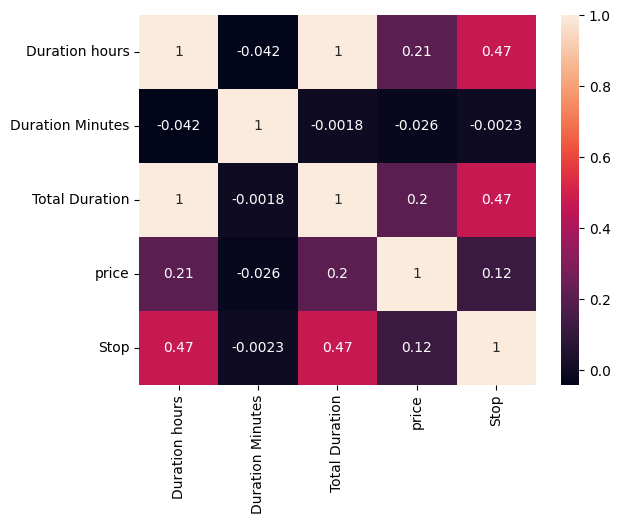

In [123]:
sns.heatmap(corr_matrix,annot = True)
plt.show()

Distribution of Prices

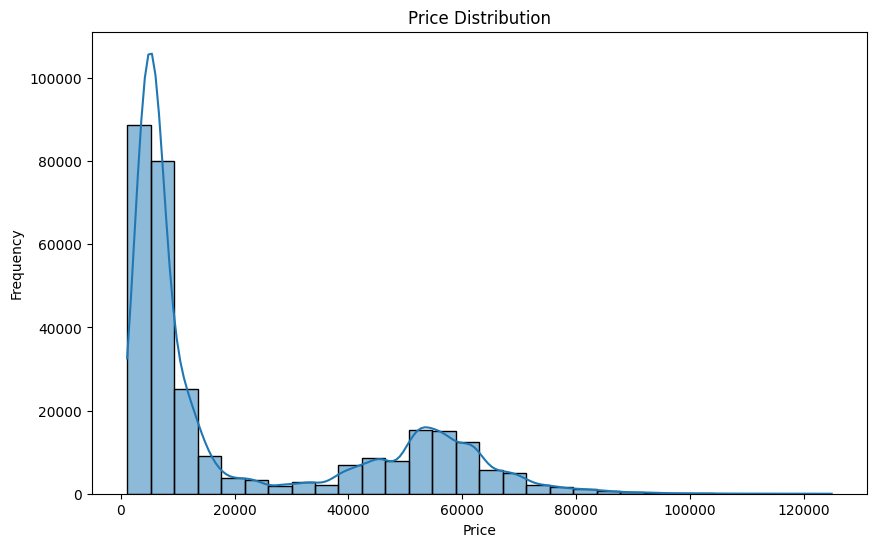

In [124]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], bins=30, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


Flight Duration Distribution

Visualize the distribution of flight duration.

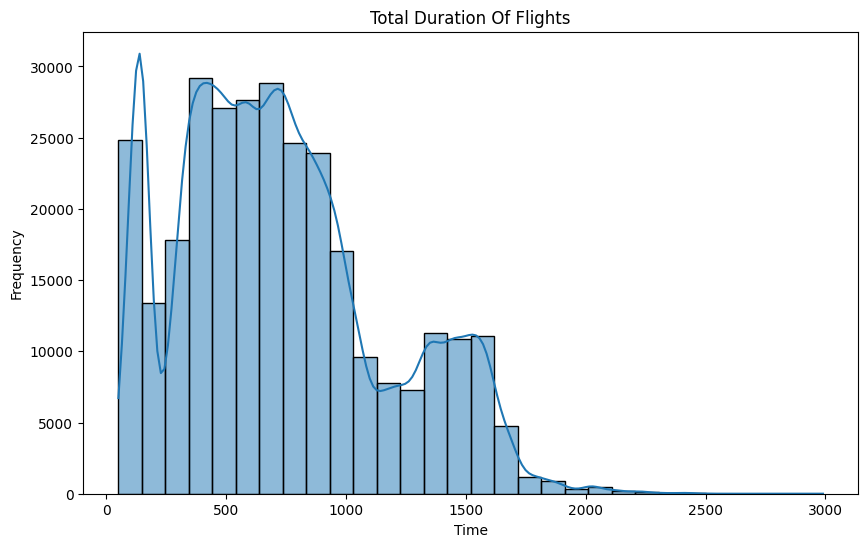

In [125]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Total Duration'], bins=30, kde=True)
plt.title('Total Duration Of Flights')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()


Price vs Duration

Check the relationship between price and flight duration.

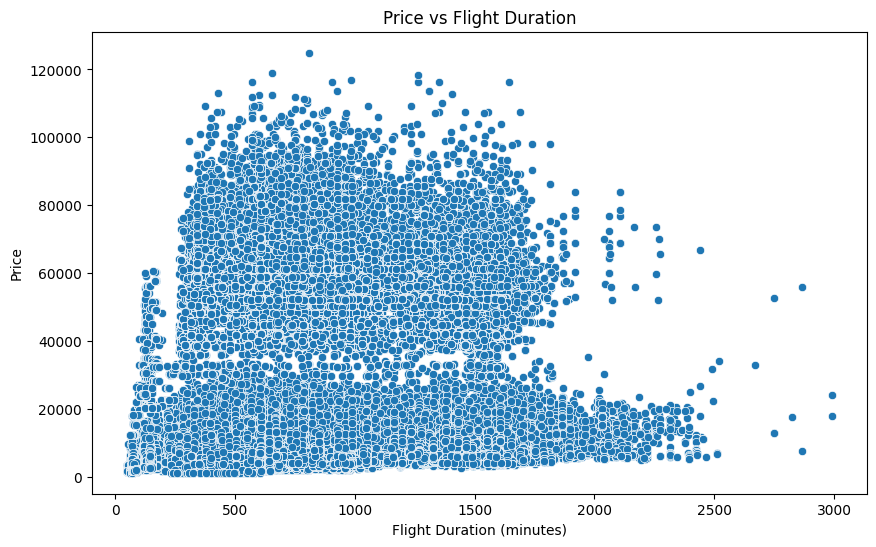

In [126]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Total Duration', y='price')
plt.title('Price vs Flight Duration')
plt.xlabel('Flight Duration (minutes)')
plt.ylabel('Price')
plt.show()


Flight Count by Airline


Create a bar plot for the number of flights by each airline.

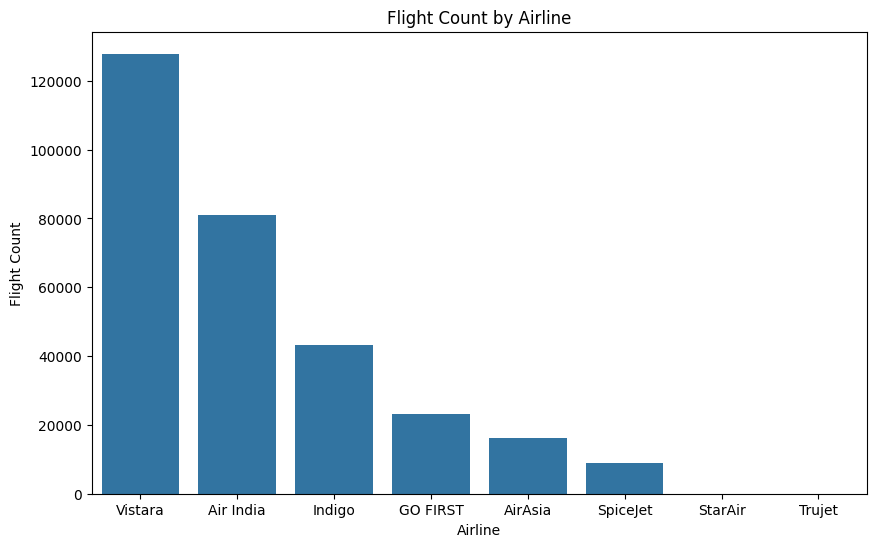

In [127]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Airline', order=df['Airline'].value_counts().index)
plt.title('Flight Count by Airline')
plt.xlabel('Airline')
plt.ylabel('Flight Count')
plt.show()

Flight Count by Airline


Create a bar plot for the number of flights by each airline.

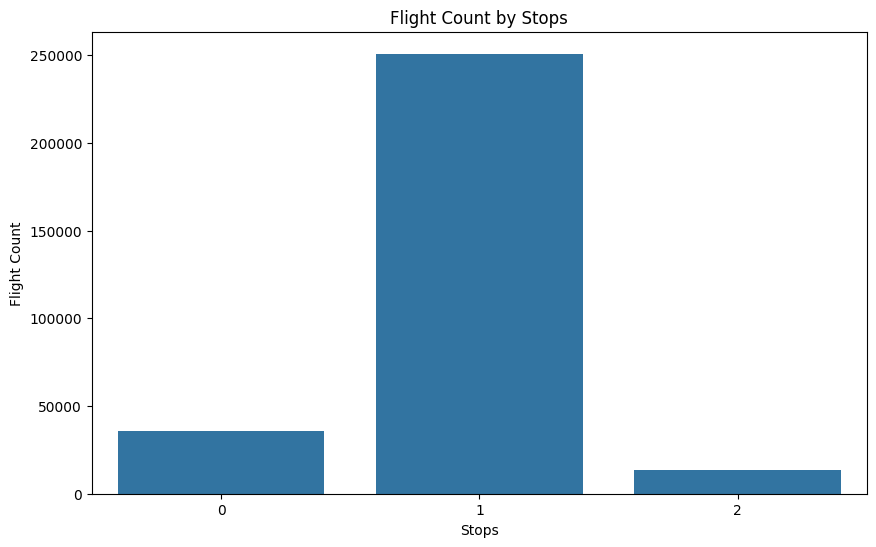

In [128]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Stop')
plt.title('Flight Count by Stops')
plt.xlabel('Stops')
plt.ylabel('Flight Count')
plt.show()

Average Price by Airline

Calculate and plot the average price for each airline.


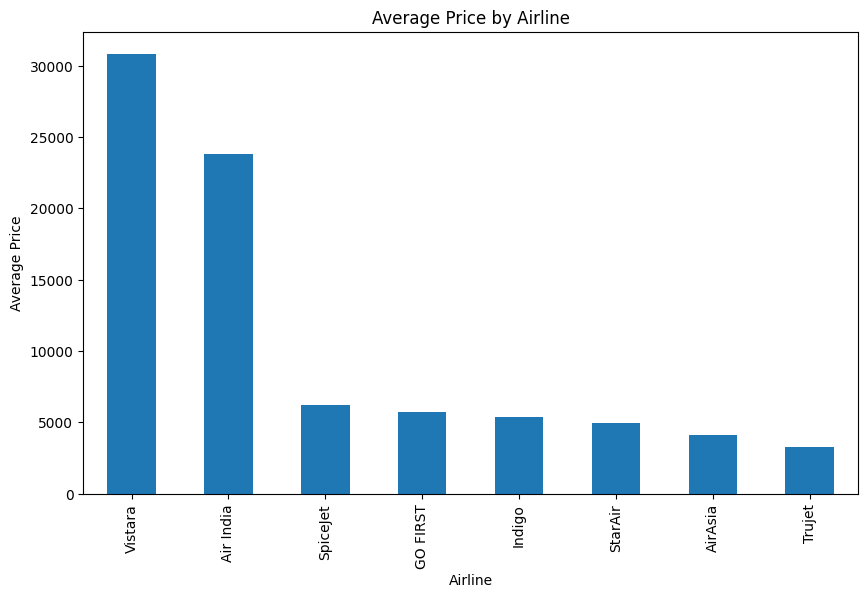

In [129]:
avg_price_airline = df.groupby('Airline')['price'].mean().sort_values(ascending = False)
plt.figure(figsize=(10, 6))
avg_price_airline.plot(kind='bar')
plt.title('Average Price by Airline')
plt.xlabel('Airline')
plt.ylabel('Average Price')
plt.show()


Flight Count by Departure time

Plot of Histogram of the Departure Times to see The Discribution of Flights


In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300261 entries, 0 to 300260
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   Flight Date       300261 non-null  datetime64[ns]
 1   Airline           300261 non-null  object        
 2   Flight No.        300261 non-null  object        
 3   Class             300261 non-null  object        
 4   Departure         300261 non-null  object        
 5   Departure Time    300261 non-null  object        
 6   Arrival           300261 non-null  object        
 7   Arrival Time      300261 non-null  object        
 8   Duration hours    300261 non-null  int64         
 9   Duration Minutes  300261 non-null  int64         
 10  Total Duration    300261 non-null  int64         
 11  price             300261 non-null  float64       
 12  Stop              300261 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(4), object(7)
memor

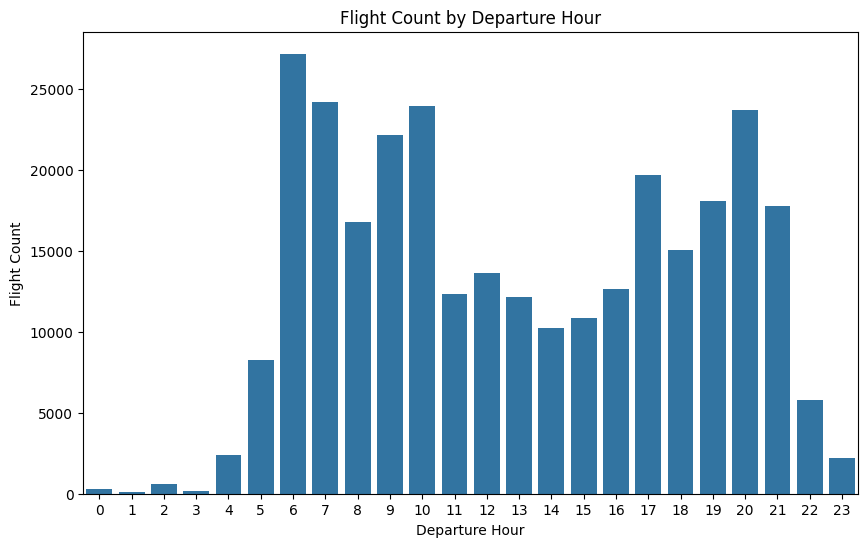

In [131]:
df['dep_hour'] = df['Departure Time'].apply(lambda x: x.hour if pd.notnull(x) else None)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='dep_hour')
plt.title('Flight Count by Departure Hour')
plt.xlabel('Departure Hour')
plt.ylabel('Flight Count')
plt.show()

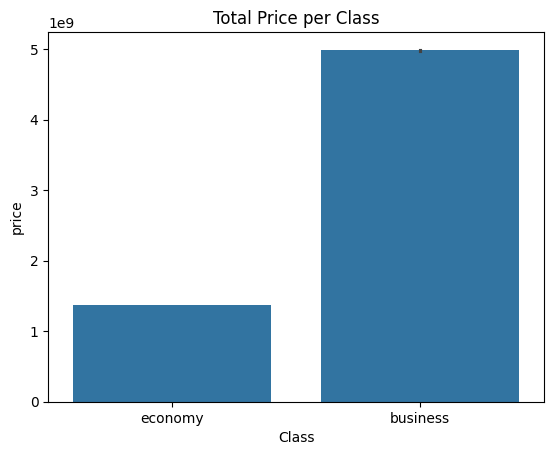

In [133]:
sns.barplot(x='Class', y='price', data=df, estimator=sum)
plt.title('Total Price per Class')
plt.show()

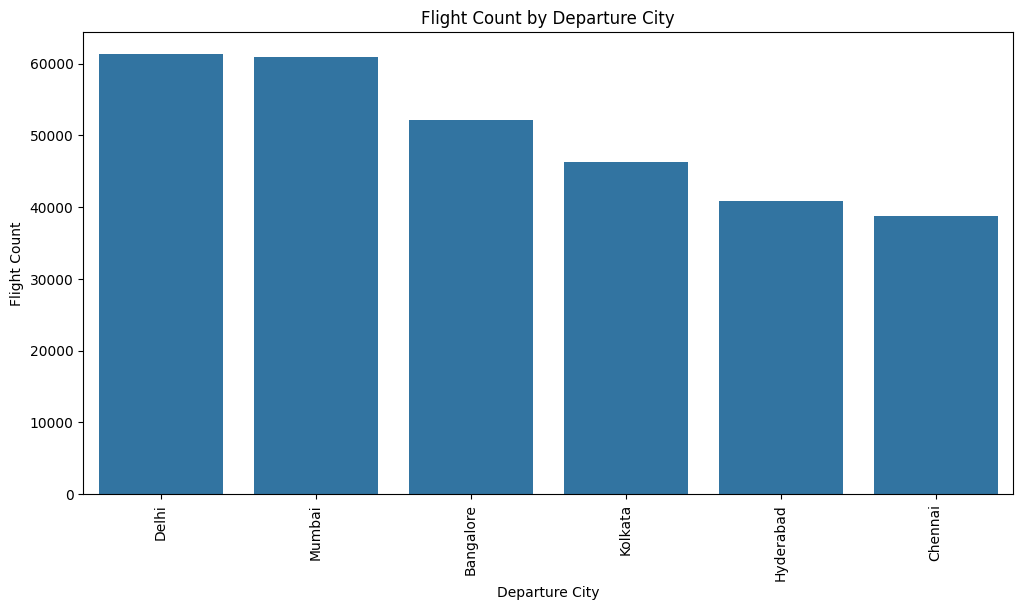

In [135]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Departure', order=df['Departure'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Flight Count by Departure City')
plt.xlabel('Departure City')
plt.ylabel('Flight Count')
plt.show()

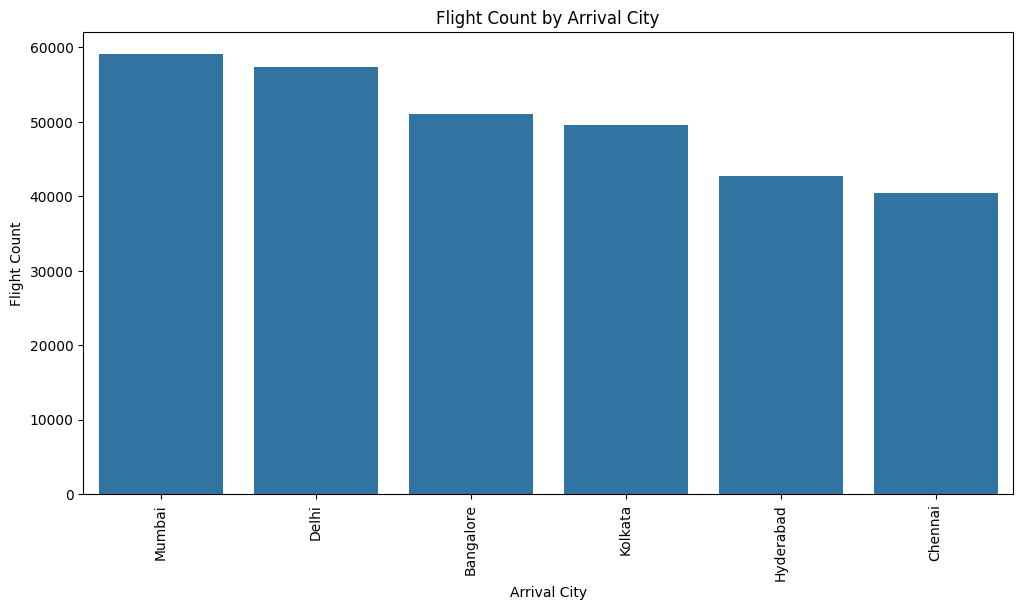

In [138]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='Arrival', order=df['Arrival'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Flight Count by Arrival City')
plt.xlabel('Arrival City')
plt.ylabel('Flight Count')
plt.show()

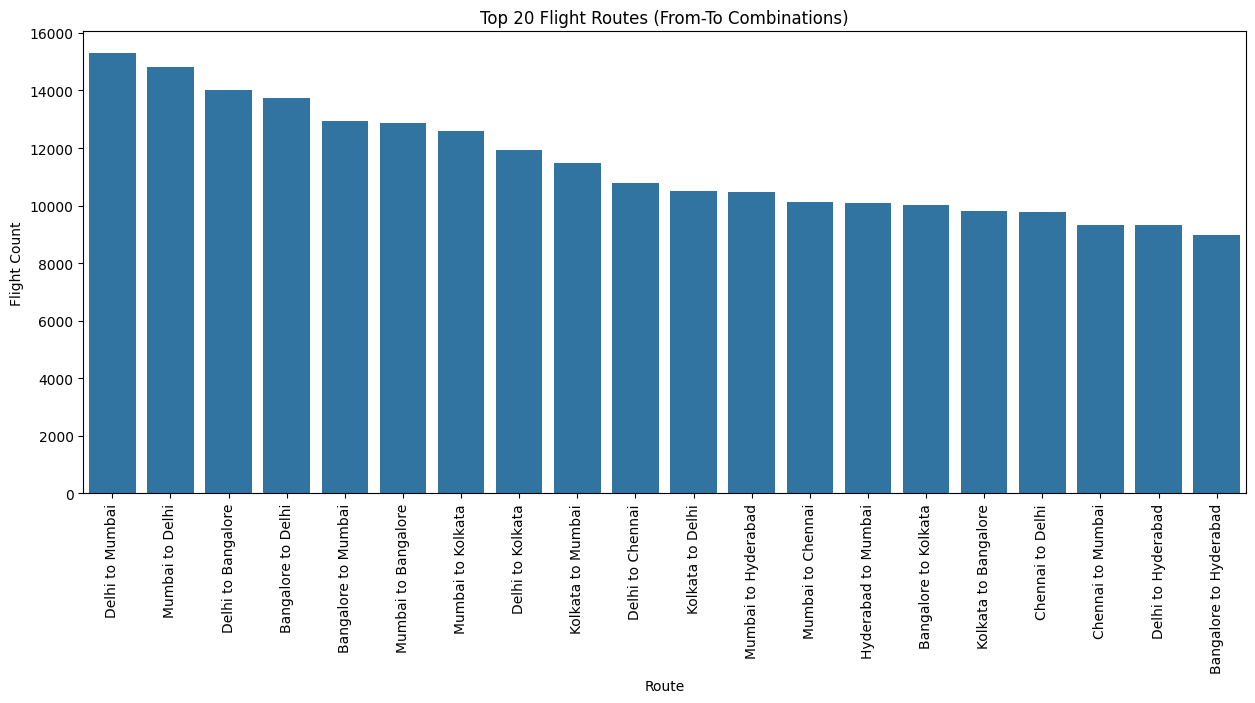

In [142]:
df['route'] = df['Departure'] + " to " + df['Arrival']
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='route', order=df['route'].value_counts().index[:20])
plt.xticks(rotation=90)
plt.title('Top 20 Flight Routes (From-To Combinations)')
plt.xlabel('Route')
plt.ylabel('Flight Count')
plt.show()
